<a href="https://colab.research.google.com/github/shauryam-daksham/PRODIGY_PIT-MAY24-0131_Task3/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns



In [2]:
# Load the dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional-full.csv"
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

In [5]:
X = df.drop('y', axis=1)
y = df['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [7]:
y_pred = clf.predict(X_test)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8737835446770864
Confusion Matrix:
 [[11103   863]
 [  849   749]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.46      0.47      0.47      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



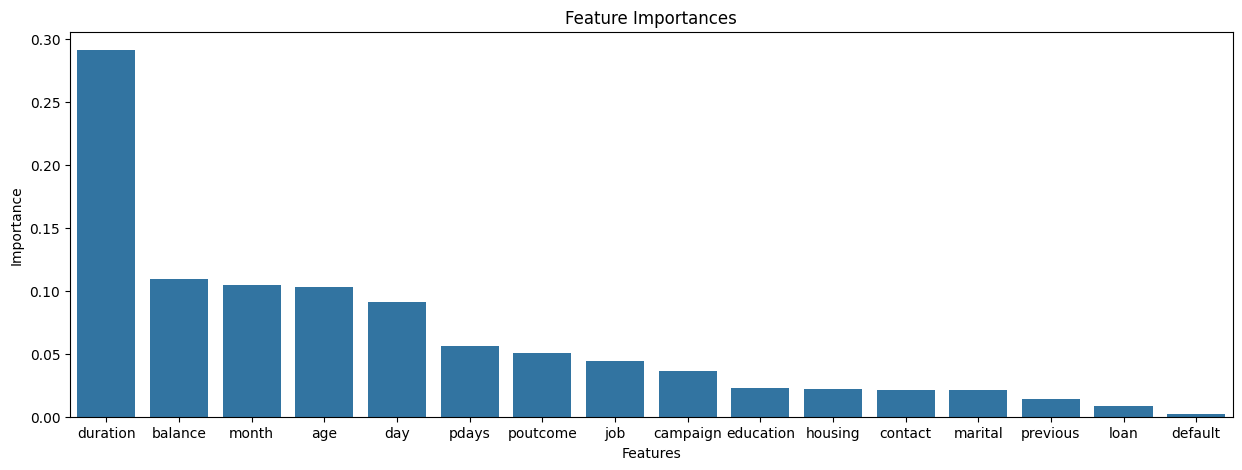

In [12]:
feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(15, 5))
sns.barplot(x=X.columns[indices], y=feature_importances[indices])
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()